#### **Introduction**

This project generates and analyzes a synthetic dataset of 10,000 adults, reflecting the age, BMI, waist circumference, fasting blood glucose, HDL, Triglyceride and high blood pressure distributions of the adult US population. I utilized the United Stated statistical trends as detailed by NHANES (CDC). By employing various novel algorithms to simulate realistic health metrics, we will be able to utilize this dataset to further analyze risk factors associated with metabolic syndrome. 

Initial Imports:
The project begins by importing essential Python libraries: numpy for numerical operations, pandas for data manipulation, matplotlib.pyplot for visualizations, and random for generating random numbers. These libraries form the foundational toolkit for handling data, performing statistical calculations, and plotting graphs.

Adult Population Dataset Generator:
The code generates a synthetic dataset of 10,000 adults, mimicking the age and BMI distribution of the adult US population. It defines age groups and their proportions, generating an age distribution accordingly. The dataset includes 'Age' and 'Gender' columns, with BMI values created based on specified characteristics for each age group. This dataset closely mirrors the age and BMI distribution, making it suitable for analyzing metabolic health risks.

Waist Circumference Generation Algorithm:
A function generates realistic waist circumference values based on BMI, age, and gender. The algorithm uses linear relationships, age adjustment factors, and random variation to simulate individual differences. The function integrates into the main dataset using pandas' apply method.

Fasting Blood Glucose Generation Algorithm:
A function generates fasting blood glucose (FBG) values based on age and BMI, using a probabilistic approach. BMI categories are defined, and base probabilities for elevated FBG are adjusted by an age factor. Values are generated using uniform distributions, reflecting realistic ranges. This function integrates into the main dataset using pandas' apply method.

Triglyceride Level Generation Algorithm:
A function generates triglyceride levels based on age and BMI category using a stratified probabilistic approach. Parameters for triglyceride levels are defined for each BMI category, with age adjustments for probabilities. Values are generated using uniform distributions and integrated into the main dataset with pandas' apply method.

HDL Cholesterol Generation Algorithm:
A function generates HDL cholesterol levels based on age, gender, and BMI category using a probabilistic approach. Gender-specific thresholds and age adjustments are applied to generate values, reflecting realistic distributions. This function uses NumPy for random generation and integrates with the main dataset using pandas' apply method.

High Blood Pressure Assignment Algorithm:
A function assigns high blood pressure status based on age and BMI category using a probabilistic approach. Base probabilities and age adjustments are applied, with random generation determining the status. This binary status is integrated into the dataset using pandas' apply method.

Identifying Metabolic Syndrome and Standardizing Dataset Columns:
This code identifies individuals with metabolic syndrome using a function that checks for five criteria: abdominal obesity, elevated triglycerides, reduced HDL cholesterol, elevated blood pressure, and elevated fasting glucose. Meeting at least three criteria classifies an individual as having metabolic syndrome. The function is applied to each row, creating a new Metabolic_Syndrome column. The code also standardizes column names for consistency and performs initial data exploration, preparing the dataset for further analysis.

Metabolic Syndrome Classification Algorithm:
A function classifies individuals for metabolic syndrome using clinical criteria, applying gender-specific thresholds for waist circumference and HDL cholesterol. The function is applied to each dataset row, generating a binary classification. The overall prevalence of metabolic syndrome is calculated and printed, along with a sample of the updated dataset.

Data Visualization of Health Metrics by BMI:
A comprehensive data visualization strategy analyzes the relationship between BMI and various health metrics, segregated by gender. Data aggregation, dual-line plots, and fine-tuning of plot aesthetics facilitate efficient visualization of complex relationships, enabling quick identification of trends and gender-specific patterns.

Data Visualization of Health Metrics by Age:
A similar data visualization strategy analyzes the relationship between age and various health metrics, segregated by gender. Age-based aggregation and dual-line plots reveal age-related health trends, providing insights for age-specific health interventions.

Comparative Analysis of Synthetic Data against NHANES Reference:
A data analysis algorithm compares the synthetic dataset with NHANES reference data, focusing on key health metrics. Percentage calculations and deviation measures provide insights into the alignment and deviations of the synthetic data from real-world statistics. This approach helps refine the data generation process for accuracy.



#### **Initial Imports**


This initial code imports essential Python libraries for data analysis and visualization. numpy is used for numerical operations and handling arrays, pandas for data manipulation and analysis, matplotlib.pyplot for creating visualizations, and random for generating random numbers. These libraries form a foundational toolkit for handling data, performing statistical calculations, and plotting graphs.










In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


#### **Adult Population Dataset Generator**


I have written a Python script that generates a dataset of 10,000 adult profiles, including age, gender, and BMI. The key features of this code are:
Implementation of a weighted age distribution based on demographic data to approximate real-world age group proportions.
A BMI generation algorithm that considers both age and gender, utilizing truncated normal distributions with parameters specific to each age group.
Utilization of NumPy for random number generation and Pandas for data manipulation and analysis.
This script may be useful for creating sample data for demographic studies or as input for machine learning models in health-related research. The code is designed to be modifiable, allowing for adjustments to age group proportions or BMI characteristics as needed. The output includes basic summary statistics and a breakdown of the age distribution across predefined bins, providing an overview of the generated dataset's characteristics.



In [2]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(42)

# Define age groups and their approximate proportions in the adult population
age_groups = {
    (18, 24): 0.12,
    (25, 34): 0.18,
    (35, 44): 0.16,
    (45, 54): 0.15,
    (55, 64): 0.16,
    (65, 74): 0.13,
    (75, 100): 0.10
}

# Flatten age groups into a list of ages based on their proportions
age_distribution = []
for (lower, upper), proportion in age_groups.items():
    age_distribution.extend([age for age in range(lower, upper + 1)] * int(proportion * 10000))

# Function to generate age based on the defined distribution
def generate_age():
    return np.random.choice(age_distribution)

# Generate example data
data = {
    'Age': [generate_age() for _ in range(10000)],
    'Gender': np.random.choice(['Male', 'Female'], 10000)
}

df_adult = pd.DataFrame(data)

# Define BMI characteristics for each age group
bmi_characteristics = {
    (18, 24): {"mean": 26.3, "std": 4.4},
    (25, 34): {"mean": 27.5, "std": 4.9},
    (35, 44): {"mean": 28.8, "std": 5.3},
    (45, 54): {"mean": 29.3, "std": 5.3},
    (55, 64): {"mean": 29.5, "std": 5.2},
    (65, 74): {"mean": 29.2, "std": 5.0},
    (75, 100): {"mean": 28.3, "std": 4.5}
}

def get_age_group(age):
    for (lower, upper), group in bmi_characteristics.items():
        if lower <= age <= upper:
            return group
    return bmi_characteristics[(75, 100)]  # Default to oldest group if age > 100

def generate_bmi(age, gender):
    group = get_age_group(age)
    mean = group['mean']
    std = group['std']
    
    # Adjust mean slightly based on gender
    if gender == 'Male':
        mean += 0.3
    else:
        mean -= 0.3
    
    # Generate BMI using normal distribution and truncate
    while True:
        bmi = np.random.normal(mean, std)
        if 15 <= bmi <= 50:
            return round(bmi, 1)

# Apply to our existing dataset
df_adult['BMI'] = df_adult.apply(lambda row: generate_bmi(row['Age'], row['Gender']), axis=1)

# Print summary statistics
print(df_adult.describe())
print("\nAge distribution:")
print(df_adult['Age'].value_counts(bins=7).sort_index())

                Age           BMI
count  10000.000000  10000.000000
mean      55.076600     28.586410
std       22.855108      4.970175
min       18.000000     15.000000
25%       35.000000     25.200000
50%       53.000000     28.600000
75%       73.000000     32.000000
max      100.000000     47.100000

Age distribution:
(17.916999999999998, 29.714]    1568
(29.714, 41.429]                1861
(41.429, 53.143]                1591
(53.143, 64.857]                1490
(64.857, 76.571]                1362
(76.571, 88.286]                1072
(88.286, 100.0]                 1056
Name: count, dtype: int64


#### **Waist Circumference Generation Algorithm**


I have implemented a function to generate realistic waist circumference values based on BMI, age, and gender. The algorithm employs a multi-step approach:
It establishes a base waist circumference using linear relationships with BMI, differentiated by gender to account for physiological differences.
An age adjustment factor is applied, incrementally increasing waist circumference for individuals over 30 years old.
Random variation is introduced using a uniform distribution to simulate individual differences.
The results are constrained within gender-specific realistic bounds to prevent outliers.
The function utilizes NumPy for random number generation and implements conditional logic for gender-based calculations. It's integrated into the main dataset using Pandas' apply method with a lambda function, efficiently generating waist circumference values for each individual in the dataset. 

In [3]:
def generate_waist_circumference(bmi, age, gender):
    if gender == 'Male':
        base_wc = (bmi * 0.8) + 12  # Increased BMI impact for men
    else:
        base_wc = (bmi * 0.7) + 10  # Increased BMI impact for women
    
    # Age adjustment (slight increase with age)
    age_factor = (age - 30) / 100  # Increased age impact
    base_wc += base_wc * max(0, age_factor)
    
    # Add random variation (±3 inches)
    wc = base_wc + np.random.uniform(-3, 3)
    
    # Ensure waist circumference is within realistic bounds
    if gender == 'Male':
        wc = max(30, min(65, wc))  # Increased range for men
    else:
        wc = max(26, min(60, wc))  # Increased range for women
    
    return round(wc, 1)

# Apply the function to generate waist circumference
df_adult['Waist_Circumference'] = df_adult.apply(lambda row: generate_waist_circumference(row['BMI'], row['Age'], row['Gender']), axis=1)


#### **Fasting Blood Glucose Generation Algorithm**


I have developed a function to generate fasting blood glucose (FBG) values based on age and BMI. The algorithm employs a probabilistic approach:
It categorizes BMI into standard health categories (underweight, normal weight, overweight, obese) using threshold values.
Base probabilities for elevated FBG are assigned to each BMI category, reflecting the increased likelihood of high FBG in higher BMI categories.
An age factor is calculated and used to adjust the probability, accounting for the tendency of FBG to increase with age.
A random number generator determines whether an individual's FBG falls in the normal or elevated range based on the calculated probability.
FBG values are then generated using uniform distributions within the appropriate range (70-99 mg/dL for normal, 100-300 mg/dL for elevated).
The function utilizes Python's random module for probability calculations and value generation. It's integrated into the main dataset using Pandas' apply method with a lambda function, efficiently generating FBG values for each individual. 

In [4]:
def get_bmi_category(bmi):
    if 18.5 <= bmi < 25:
        return "Normal weight"
    elif 25 <= bmi < 30:
        return "Overweight"
    elif bmi >= 30:
        return "Obese"
    else:
        return "Underweight"

def get_base_probability(bmi_category):
    probabilities = {
        "Normal weight": 0.15,
        "Overweight": 0.35,
        "Obese": 0.50
    }
    return probabilities.get(bmi_category, 0.15)

def generate_fbg(age, bmi):
    bmi_category = get_bmi_category(bmi)
    base_prob = get_base_probability(bmi_category)
    
    # Adjust probability with age factor
    age_factor = (age - 18) / (90 - 18)
    prob = base_prob + (0.1 * age_factor)  # Increase base probability with age factor
    
    if random.random() < prob:
        # Generate FBG for FBG >= 100 mg/dL
        return round(random.uniform(100, 300))
    else:
        # Generate FBG for normal range
        return round(random.uniform(70, 99))

# Apply to our dataset
df_adult['FBG'] = df_adult.apply(lambda row: generate_fbg(row['Age'], row['BMI']), axis=1)


#### **Triglyceride Level Generation Algorithm**


I have implemented a function to generate triglyceride levels based on age and BMI category. The algorithm utilizes a stratified probabilistic approach:
It defines triglyceride parameters (range and probability of elevated levels) for each BMI category, reflecting the correlation between BMI and triglyceride levels.
An age factor is calculated and used to adjust the probability of elevated triglycerides, accounting for the tendency of triglyceride levels to increase with age.
A random number generator determines whether an individual's triglyceride level falls in the normal or elevated range based on the calculated probability.
Triglyceride values are then generated using uniform distributions within the appropriate range, which varies by BMI category.
The function employs NumPy for efficient random number generation. It's integrated into the main dataset using Pandas' apply method with a lambda function, generating triglyceride values for each individual.

In [5]:
triglyceride_params = {
    'Underweight': {'range': (30, 200), 'prob_over_150': 0.05},
    'Normal weight': {'range': (40, 250), 'prob_over_150': 0.10},
    'Overweight': {'range': (50, 300), 'prob_over_150': 0.25},
    'Obese': {'range': (60, 350), 'prob_over_150': 0.35}
}

def generate_triglyceride(age, bmi_category):
    params = triglyceride_params.get(bmi_category, triglyceride_params['Normal weight'])
    
    # Adjust probability with age factor
    age_factor = (age - 18) / (90 - 18)
    prob = params['prob_over_150'] + (0.1 * age_factor)  # Increase base probability with age factor
    
    if np.random.rand() < prob:
        return round(np.random.uniform(151, params['range'][1]))
    else:
        return round(np.random.uniform(params['range'][0], 150))

df_adult['BMI_Category'] = df_adult['BMI'].apply(get_bmi_category)

# Apply the function to generate triglyceride values
df_adult['Triglyceride'] = df_adult.apply(lambda row: generate_triglyceride(row['Age'], row['BMI_Category']), axis=1)


#### **HDL Cholesterol Generation Algorithm**


I have developed a function to generate High-Density Lipoprotein (HDL) cholesterol levels based on age, gender, and BMI category. The algorithm employs a multi-faceted probabilistic approach:
It utilizes a nested dictionary structure to define HDL parameters (range and probability of levels below threshold) for each combination of gender and BMI category, reflecting the complex interplay between these factors and HDL levels.
Gender-specific thresholds are implemented (40 mg/dL for males, 50 mg/dL for females) to accurately represent clinical guidelines.
An age factor is calculated and used to adjust the probability of below-threshold HDL levels, accounting for age-related changes in cholesterol metabolism.
A random number generator determines whether an individual's HDL level falls below or above the threshold based on the calculated probability.
HDL values are then generated using uniform distributions within the appropriate range, which varies by gender and BMI category.
The function uses NumPy for efficient random number generation and is integrated into the main dataset using Pandas' apply method with a lambda function. This approach aims to create a realistic distribution of HDL levels that correlates with age, gender, and BMI category. 


In [6]:
hdl_params = {
    'Male': {
        'Underweight': {'range': (30, 80), 'prob_under_threshold': 0.08},
        'Normal weight': {'range': (30, 80), 'prob_under_threshold': 0.15},
        'Overweight': {'range': (25, 70), 'prob_under_threshold': 0.25},
        'Obese': {'range': (20, 60), 'prob_under_threshold': 0.40},
    },
    'Female': {
        'Underweight': {'range': (30, 80), 'prob_under_threshold': 0.03},
        'Normal weight': {'range': (30, 80), 'prob_under_threshold': 0.05},
        'Overweight': {'range': (25, 70), 'prob_under_threshold': 0.08},
        'Obese': {'range': (20, 60), 'prob_under_threshold': 0.15},
    }
}

def generate_hdl(age, row):
    gender = row['Gender']
    category = row['BMI_Category']
    
    hdl_range = hdl_params[gender][category]['range']
    prob_under_threshold = hdl_params[gender][category]['prob_under_threshold']
    
    threshold = 40 if gender == 'Male' else 50
    
    # Adjust probability with age factor
    age_factor = (age - 18) / (90 - 18)
    prob = prob_under_threshold + (0.1 * age_factor)  # Increase probability with age factor
    
    if np.random.rand() < prob:
        hdl = np.random.uniform(hdl_range[0], threshold)
    else:
        hdl = np.random.uniform(threshold, hdl_range[1])
    
    return round(hdl)

# Apply the function to generate HDL values
df_adult['HDL'] = df_adult.apply(lambda row: generate_hdl(row['Age'], row), axis=1)


#### **High Blood Pressure Assignment Algorithm**


I have implemented a function to assign high blood pressure status based on age and BMI category. The algorithm employs a probabilistic approach with the following key features:
It uses a dictionary to define base probabilities of high blood pressure for each BMI category, reflecting the known correlation between BMI and hypertension risk.
An age factor is calculated and used to adjust the probability, accounting for the increased likelihood of high blood pressure with advancing age.
The final probability is computed by combining the base probability and the age factor.
A random number generator determines whether an individual is assigned high blood pressure status based on the calculated probability.
The function utilizes NumPy for random number generation and is integrated into the main dataset using Pandas' apply method with a lambda function. This approach generates a binary high blood pressure status (0 or 1) for each individual in the dataset. The algorithm aims to create a realistic distribution of high blood pressure cases that correlates with both age and BMI category, potentially useful for cardiovascular risk studies or public health analyses. The code calculates the overall percentage of individuals assigned high blood pressure status, storing this information in the high_bp_percentage variable for potential further use. Finally, it prints the first 10 rows of the dataset, providing a quick glimpse into the generated data including the new high blood pressure status column.

In [7]:
# Corrected High Blood Pressure Code

high_bp_prob = {
    'Underweight': 0.10,
    'Normal weight': 0.20,
    'Overweight': 0.35,
    'Obese': 0.50
}

def assign_high_bp(age, row):
    category = row['BMI_Category']
    base_prob = high_bp_prob[category]
    
    # Adjust probability with age factor
    age_factor = (age - 18) / (90 - 18)
    prob = base_prob + (0.1 * age_factor)  # Increase base probability with age factor
    
    if np.random.rand() < prob:
        return 1
    else:
        return 0

# Apply the function to assign high blood pressure status
df_adult['High_Blood_Pressure'] = df_adult.apply(lambda row: assign_high_bp(row['Age'], row), axis=1)

# Calculate the percentage of individuals with high blood pressure
high_bp_percentage = df_adult['High_Blood_Pressure'].mean() * 100

# Print the first 10 rows of the dataset
print(df_adult.head(10))


   Age  Gender   BMI  Waist_Circumference  FBG   BMI_Category  Triglyceride  \
0   30  Female  24.9                 27.0   81  Normal weight           139   
1   24    Male  28.0                 33.1   96     Overweight            52   
2   79    Male  30.9                 54.6  176          Obese           268   
3   75    Male  32.4                 57.2  222          Obese           181   
4   65    Male  34.2                 50.4  141          Obese           128   
5   51  Female  30.0                 40.4  148          Obese            70   
6   18    Male  22.4                 32.9   86  Normal weight           132   
7   71  Female  32.1                 46.4  230          Obese           133   
8   39    Male  27.8                 36.3   74     Overweight           136   
9   81  Female  15.4                 29.7  225    Underweight            67   

   HDL  High_Blood_Pressure  
0   36                    0  
1   42                    0  
2   58                    0  
3   56    

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_adult is already loaded with your data

# Define risk factors
def has_metabolic_syndrome(row):
    criteria = 0
    
    # Abdominal Obesity
    if (row['Gender'] == 'Male' and row['Waist_Circumference'] > 40) or (row['Gender'] == 'Female' and row['Waist_Circumference'] > 35):
        criteria += 1
    
    # Elevated Triglycerides
    if row['Triglyceride'] >= 150:
        criteria += 1
    
    # Reduced HDL Cholesterol
    if (row['Gender'] == 'Male' and row['HDL'] < 40) or (row['Gender'] == 'Female' and row['HDL'] < 50):
        criteria += 1
    
    # Elevated Blood Pressure
    if row['High_Blood_Pressure'] == 1:
        criteria += 1
    
    # Elevated Fasting Glucose
    if row['FBG'] >= 100:
        criteria += 1
    
    return criteria >= 3

# Apply the function to determine metabolic syndrome
df_adult['Metabolic_Syndrome'] = df_adult.apply(has_metabolic_syndrome, axis=1)

# Now, standardize the column names
print("Original column names:")
print(list(df_adult.columns))

column_mapping = {
    'Age': 'Age',
    'Gender': 'Gender',
    'BMI': 'BMI',
    'Waist_Circumference': 'Waist_Circumference',
    'FBG': 'Fasting_Blood_Glucose',
    'BMI_Category': 'BMI_Category',
    'Triglyceride': 'Triglycerides',
    'HDL': 'HDL_Cholesterol',
    'High_Blood_Pressure': 'High_Blood_Pressure',
    'Metabolic_Syndrome': 'Metabolic_Syndrome'
}

# Rename the columns
df_adult = df_adult.rename(columns=column_mapping)

print("\nStandardized column names:")
print(list(df_adult.columns))

# Basic statistical summary of the dataset
print("\nDataset Summary:")
print(df_adult.describe())

# Check for missing values
print("\nMissing Values:")
print(df_adult.isnull().sum())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df_adult.head())

# Now you can proceed with your analysis using the standardized column names

Original column names:
['Age', 'Gender', 'BMI', 'Waist_Circumference', 'FBG', 'BMI_Category', 'Triglyceride', 'HDL', 'High_Blood_Pressure', 'Metabolic_Syndrome']

Standardized column names:
['Age', 'Gender', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 'BMI_Category', 'Triglycerides', 'HDL_Cholesterol', 'High_Blood_Pressure', 'Metabolic_Syndrome']

Dataset Summary:
                Age           BMI  Waist_Circumference  Fasting_Blood_Glucose  \
count  10000.000000  10000.000000         10000.000000           10000.000000   
mean      55.076600     28.586410            41.013900             131.182900   
std       22.855108      4.970175             9.258669              67.351603   
min       18.000000     15.000000            26.000000              70.000000   
25%       35.000000     25.200000            33.600000              82.000000   
50%       53.000000     28.600000            40.200000              95.000000   
75%       73.000000     32.000000            47.500000 

#### **Dataset Analysis and Visualization**


I have implemented a series of basic data analysis and visualization steps to provide an overview of the generated dataset. The code utilizes Pandas' built-in functions for efficient data summarization:
It uses the shape attribute to report the dimensions of the dataset, giving an immediate sense of the number of records and variables.
The describe() method is employed to generate summary statistics for all numeric columns, including count, mean, standard deviation, and quartile values. This provides a quick statistical overview of the dataset's distributions.
The head() function is used to display the first few rows of the dataset, allowing for a visual inspection of the data structure and content.


In [9]:
# Check the size of the dataset
print("Dataset size:", df_adult.shape)

# Display basic statistics of the dataset
print("Basic statistics:")
print(df_adult.describe())

# Display the first few rows to visually inspect the dataset
print("First few rows of the dataset:")
print(df_adult.head())


Dataset size: (10000, 10)
Basic statistics:
                Age           BMI  Waist_Circumference  Fasting_Blood_Glucose  \
count  10000.000000  10000.000000         10000.000000           10000.000000   
mean      55.076600     28.586410            41.013900             131.182900   
std       22.855108      4.970175             9.258669              67.351603   
min       18.000000     15.000000            26.000000              70.000000   
25%       35.000000     25.200000            33.600000              82.000000   
50%       53.000000     28.600000            40.200000              95.000000   
75%       73.000000     32.000000            47.500000             175.000000   
max      100.000000     47.100000            65.000000             300.000000   

       Triglycerides  HDL_Cholesterol  High_Blood_Pressure  
count   10000.000000     10000.000000          10000.00000  
mean      141.168800        51.628700              0.42410  
std        72.767023        13.274451      

#### **Metabolic Syndrome Classification Algorithm**


I have developed a function to classify individuals for metabolic syndrome based on established clinical criteria. The algorithm employs a cumulative scoring approach using five key health indicators:
Abdominal obesity: waist circumference > 40 inches for males or > 35 inches for females
Elevated triglycerides: ≥ 150 mg/dL
Reduced HDL cholesterol: < 40 mg/dL for males or < 50 mg/dL for females
Elevated blood pressure: presence of high blood pressure (as previously defined)
Elevated fasting blood glucose: ≥ 100 mg/dL
The function evaluates each criterion, incrementing a counter for each one met. Metabolic syndrome is diagnosed if three or more criteria are satisfied. Gender-specific thresholds are applied for waist circumference and HDL cholesterol, aligning with clinical guidelines. The function is applied to each row of the dataset using Pandas' apply method, generating a binary classification (True/False) for metabolic syndrome.
The code then calculates the overall prevalence of metabolic syndrome in the simulated population using Pandas' mean function, multiplied by 100 to express the result as a percentage. The results are printed, providing both the prevalence statistic and a sample of the updated dataset for verification. 

In [10]:
# Define criteria for metabolic syndrome
def has_metabolic_syndrome(row):
    criteria = 0
    
    # Abdominal Obesity
    if (row['Gender'] == 'Male' and row['Waist_Circumference'] > 40) or (row['Gender'] == 'Female' and row['Waist_Circumference'] > 35):
        criteria += 1
    
    # Elevated Triglycerides
    if row['Triglycerides'] >= 150:
        criteria += 1
    
    # Reduced HDL Cholesterol
    if (row['Gender'] == 'Male' and row['HDL_Cholesterol'] < 40) or (row['Gender'] == 'Female' and row['HDL_Cholesterol'] < 50):
        criteria += 1
    
    # Elevated Blood Pressure
    if row['High_Blood_Pressure'] == 1:
        criteria += 1
    
    # Elevated Fasting Glucose
    if row['Fasting_Blood_Glucose'] >= 100:
        criteria += 1
    
    return criteria >= 3

# Apply the function to each row to determine if the individual has metabolic syndrome
df_adult['Metabolic_Syndrome'] = df_adult.apply(has_metabolic_syndrome, axis=1)

# Calculate the percentage of individuals with metabolic syndrome
metabolic_syndrome_percentage = df_adult['Metabolic_Syndrome'].mean() * 100

# Print the result
print(f"Percentage of individuals with Metabolic Syndrome: {metabolic_syndrome_percentage:.2f}%")

# Display the first few rows to verify the results
print("First few rows of the dataset with Metabolic Syndrome status:")
print(df_adult.head(10))

Percentage of individuals with Metabolic Syndrome: 34.45%
First few rows of the dataset with Metabolic Syndrome status:
   Age  Gender   BMI  Waist_Circumference  Fasting_Blood_Glucose  \
0   30  Female  24.9                 27.0                     81   
1   24    Male  28.0                 33.1                     96   
2   79    Male  30.9                 54.6                    176   
3   75    Male  32.4                 57.2                    222   
4   65    Male  34.2                 50.4                    141   
5   51  Female  30.0                 40.4                    148   
6   18    Male  22.4                 32.9                     86   
7   71  Female  32.1                 46.4                    230   
8   39    Male  27.8                 36.3                     74   
9   81  Female  15.4                 29.7                    225   

    BMI_Category  Triglycerides  HDL_Cholesterol  High_Blood_Pressure  \
0  Normal weight            139               36          

#### **Data Visualization of Health Metrics by BMI**


I have implemented a comprehensive data visualization strategy to analyze the relationship between BMI and various health metrics, segregated by gender. The algorithm employs pandas for data manipulation and matplotlib for plotting. Key features include:
Data aggregation using pandas' groupby function, calculating mean values of health metrics for each rounded BMI value, separately for males and females.
Utilization of matplotlib's subplot functionality to create a 2x3 grid of plots, each focusing on a different health metric.
Implementation of dual-line plots for each metric, using distinct colors (blue for males, red for females) to facilitate gender-based comparisons.
Fine-tuning of plot aesthetics, including reduced marker size (4) and line width (1) for improved clarity, especially in dense data regions.
Consistent styling across all subplots, including dashed grid lines with reduced opacity (0.7) for a clean, professional appearance.
Clear labeling of axes, titles, and legends to ensure easy interpretation of the visualized data.
This approach allows for efficient visualization of complex relationships between BMI and multiple health indicators, enabling quick identification of trends and gender-specific patterns in the dataset. The use of rounded BMI values helps in smoothing out potential noise in the data, providing a clearer overall picture of the trends.


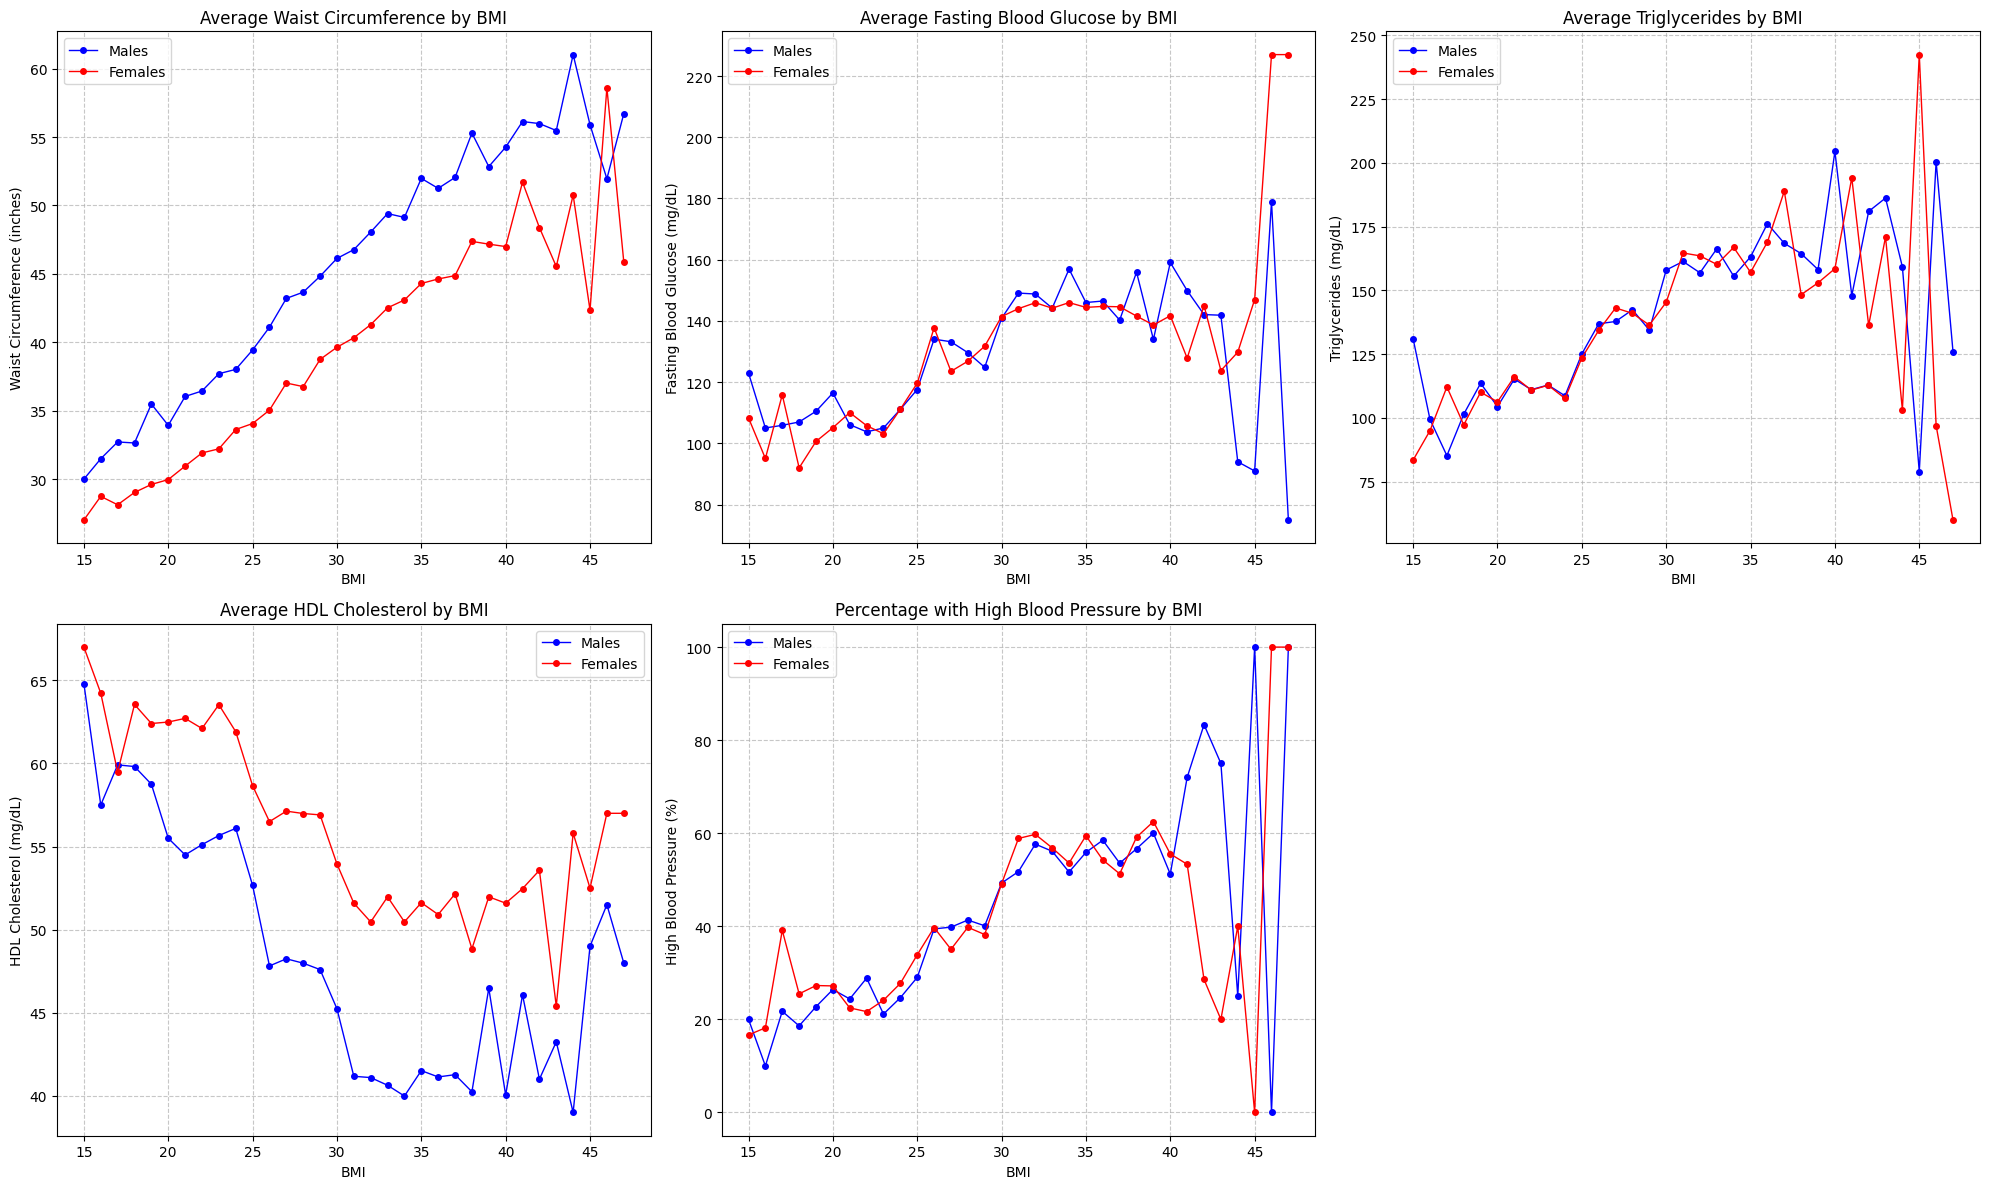

In [11]:
import matplotlib.pyplot as plt

# Calculate average values per BMI unit for each risk factor for males and females separately

# Waist Circumference
avg_wc_per_bmi_male = df_adult[df_adult['Gender'] == 'Male'].groupby(df_adult['BMI'].round())['Waist_Circumference'].mean()
avg_wc_per_bmi_female = df_adult[df_adult['Gender'] == 'Female'].groupby(df_adult['BMI'].round())['Waist_Circumference'].mean()

# Fasting Blood Glucose
avg_fbg_per_bmi_male = df_adult[df_adult['Gender'] == 'Male'].groupby(df_adult['BMI'].round())['Fasting_Blood_Glucose'].mean()
avg_fbg_per_bmi_female = df_adult[df_adult['Gender'] == 'Female'].groupby(df_adult['BMI'].round())['Fasting_Blood_Glucose'].mean()

# Triglycerides
avg_tri_per_bmi_male = df_adult[df_adult['Gender'] == 'Male'].groupby(df_adult['BMI'].round())['Triglycerides'].mean()
avg_tri_per_bmi_female = df_adult[df_adult['Gender'] == 'Female'].groupby(df_adult['BMI'].round())['Triglycerides'].mean()

# HDL Cholesterol
avg_hdl_per_bmi_male = df_adult[df_adult['Gender'] == 'Male'].groupby(df_adult['BMI'].round())['HDL_Cholesterol'].mean()
avg_hdl_per_bmi_female = df_adult[df_adult['Gender'] == 'Female'].groupby(df_adult['BMI'].round())['HDL_Cholesterol'].mean()

# High Blood Pressure
avg_bp_per_bmi_male = df_adult[df_adult['Gender'] == 'Male'].groupby(df_adult['BMI'].round())['High_Blood_Pressure'].mean() * 100
avg_bp_per_bmi_female = df_adult[df_adult['Gender'] == 'Female'].groupby(df_adult['BMI'].round())['High_Blood_Pressure'].mean() * 100

# Plot the line graphs
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.plot(avg_wc_per_bmi_male.index, avg_wc_per_bmi_male.values, marker='o', linestyle='-', color='b', label='Males', markersize=4, linewidth=1)
plt.plot(avg_wc_per_bmi_female.index, avg_wc_per_bmi_female.values, marker='o', linestyle='-', color='r', label='Females', markersize=4, linewidth=1)
plt.title('Average Waist Circumference by BMI')
plt.xlabel('BMI')
plt.ylabel('Waist Circumference (inches)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 3, 2)
plt.plot(avg_fbg_per_bmi_male.index, avg_fbg_per_bmi_male.values, marker='o', linestyle='-', color='b', label='Males', markersize=4, linewidth=1)
plt.plot(avg_fbg_per_bmi_female.index, avg_fbg_per_bmi_female.values, marker='o', linestyle='-', color='r', label='Females', markersize=4, linewidth=1)
plt.title('Average Fasting Blood Glucose by BMI')
plt.xlabel('BMI')
plt.ylabel('Fasting Blood Glucose (mg/dL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 3, 3)
plt.plot(avg_tri_per_bmi_male.index, avg_tri_per_bmi_male.values, marker='o', linestyle='-', color='b', label='Males', markersize=4, linewidth=1)
plt.plot(avg_tri_per_bmi_female.index, avg_tri_per_bmi_female.values, marker='o', linestyle='-', color='r', label='Females', markersize=4, linewidth=1)
plt.title('Average Triglycerides by BMI')
plt.xlabel('BMI')
plt.ylabel('Triglycerides (mg/dL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 3, 4)
plt.plot(avg_hdl_per_bmi_male.index, avg_hdl_per_bmi_male.values, marker='o', linestyle='-', color='b', label='Males', markersize=4, linewidth=1)
plt.plot(avg_hdl_per_bmi_female.index, avg_hdl_per_bmi_female.values, marker='o', linestyle='-', color='r', label='Females', markersize=4, linewidth=1)
plt.title('Average HDL Cholesterol by BMI')
plt.xlabel('BMI')
plt.ylabel('HDL Cholesterol (mg/dL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 3, 5)
plt.plot(avg_bp_per_bmi_male.index, avg_bp_per_bmi_male.values, marker='o', linestyle='-', color='b', label='Males', markersize=4, linewidth=1)
plt.plot(avg_bp_per_bmi_female.index, avg_bp_per_bmi_female.values, marker='o', linestyle='-', color='r', label='Females', markersize=4, linewidth=1)
plt.title('Percentage with High Blood Pressure by BMI')
plt.xlabel('BMI')
plt.ylabel('High Blood Pressure (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### **Data Visualization of Health Metrics by Age**


I have implemented a comprehensive data visualization strategy to analyze the relationship between age and various health metrics, segregated by gender. The algorithm utilizes pandas for data manipulation and matplotlib for plotting. Key features include:
Data aggregation using pandas' groupby function, calculating mean values of health metrics for each rounded age value, separately for males and females.
Utilization of matplotlib's subplot functionality to create a 2x3 grid of plots, each focusing on a different health metric.
Implementation of dual-line plots for each metric, using distinct colors (blue for males, red for females) to facilitate gender-based comparisons across age groups.
Fine-tuning of plot aesthetics, including reduced marker size (4) and line width (1) for improved clarity, especially in dense data regions.
Consistent styling across all subplots, including dashed grid lines with reduced opacity (0.7) for a clean, professional appearance.
Clear labeling of axes, titles, and legends to ensure easy interpretation of the visualized data.
This approach allows for efficient visualization of complex relationships between age and multiple health indicators, enabling quick identification of trends and gender-specific patterns in the dataset. The use of rounded age values helps in smoothing out potential noise in the data, providing a clearer overall picture of age-related health trends. 

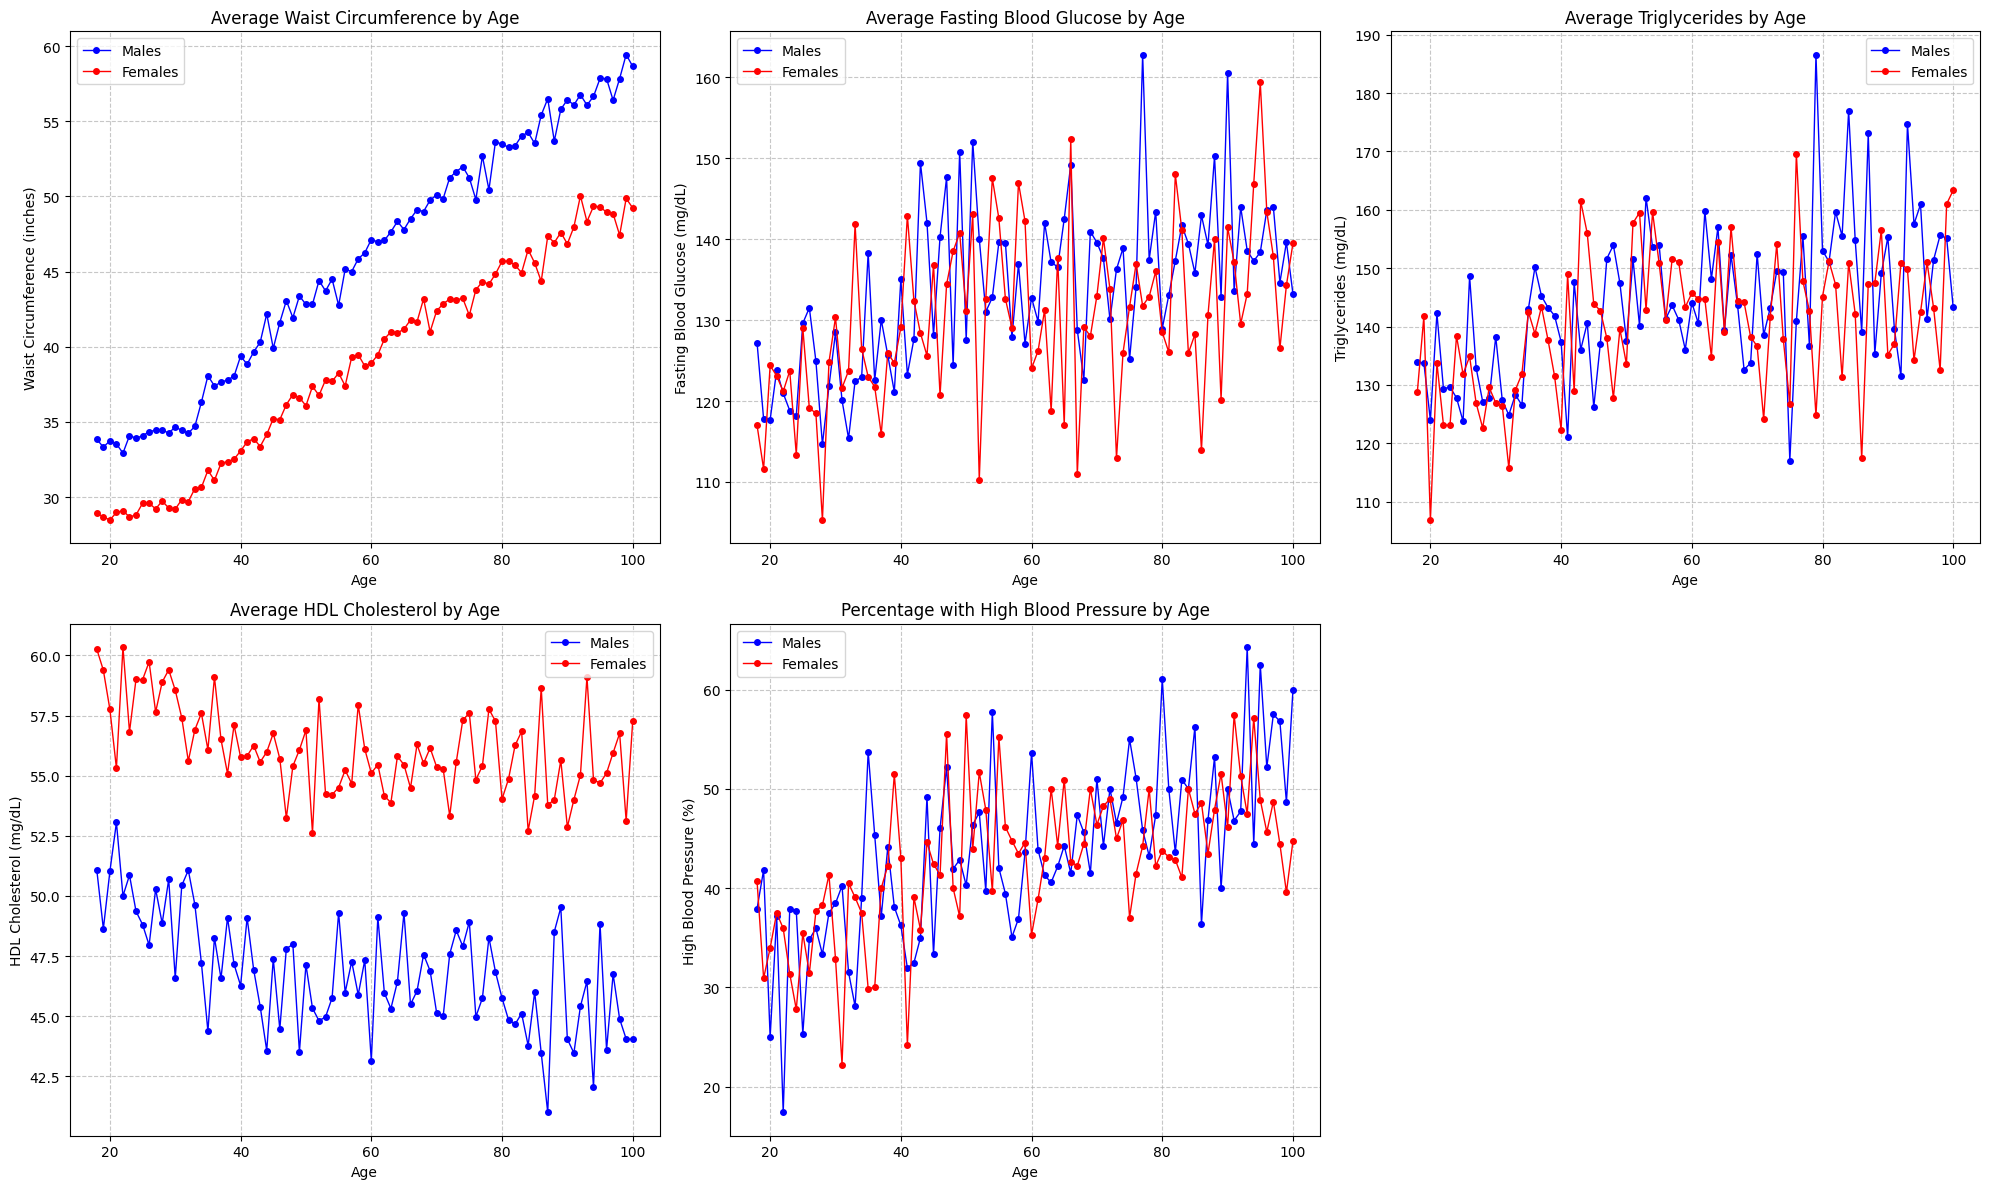

In [12]:
import matplotlib.pyplot as plt

# Calculate average values per age unit for each risk factor for males and females separately

# Waist Circumference
avg_wc_per_age_male = df_adult[df_adult['Gender'] == 'Male'].groupby(df_adult['Age'].round())['Waist_Circumference'].mean()
avg_wc_per_age_female = df_adult[df_adult['Gender'] == 'Female'].groupby(df_adult['Age'].round())['Waist_Circumference'].mean()

# Fasting Blood Glucose
avg_fbg_per_age_male = df_adult[df_adult['Gender'] == 'Male'].groupby(df_adult['Age'].round())['Fasting_Blood_Glucose'].mean()
avg_fbg_per_age_female = df_adult[df_adult['Gender'] == 'Female'].groupby(df_adult['Age'].round())['Fasting_Blood_Glucose'].mean()

# Triglycerides
avg_tri_per_age_male = df_adult[df_adult['Gender'] == 'Male'].groupby(df_adult['Age'].round())['Triglycerides'].mean()
avg_tri_per_age_female = df_adult[df_adult['Gender'] == 'Female'].groupby(df_adult['Age'].round())['Triglycerides'].mean()

# HDL Cholesterol
avg_hdl_per_age_male = df_adult[df_adult['Gender'] == 'Male'].groupby(df_adult['Age'].round())['HDL_Cholesterol'].mean()
avg_hdl_per_age_female = df_adult[df_adult['Gender'] == 'Female'].groupby(df_adult['Age'].round())['HDL_Cholesterol'].mean()

# High Blood Pressure
avg_bp_per_age_male = df_adult[df_adult['Gender'] == 'Male'].groupby(df_adult['Age'].round())['High_Blood_Pressure'].mean() * 100
avg_bp_per_age_female = df_adult[df_adult['Gender'] == 'Female'].groupby(df_adult['Age'].round())['High_Blood_Pressure'].mean() * 100

# Plot the line graphs
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.plot(avg_wc_per_age_male.index, avg_wc_per_age_male.values, marker='o', linestyle='-', color='b', label='Males', markersize=4, linewidth=1)
plt.plot(avg_wc_per_age_female.index, avg_wc_per_age_female.values, marker='o', linestyle='-', color='r', label='Females', markersize=4, linewidth=1)
plt.title('Average Waist Circumference by Age')
plt.xlabel('Age')
plt.ylabel('Waist Circumference (inches)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 3, 2)
plt.plot(avg_fbg_per_age_male.index, avg_fbg_per_age_male.values, marker='o', linestyle='-', color='b', label='Males', markersize=4, linewidth=1)
plt.plot(avg_fbg_per_age_female.index, avg_fbg_per_age_female.values, marker='o', linestyle='-', color='r', label='Females', markersize=4, linewidth=1)
plt.title('Average Fasting Blood Glucose by Age')
plt.xlabel('Age')
plt.ylabel('Fasting Blood Glucose (mg/dL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 3, 3)
plt.plot(avg_tri_per_age_male.index, avg_tri_per_age_male.values, marker='o', linestyle='-', color='b', label='Males', markersize=4, linewidth=1)
plt.plot(avg_tri_per_age_female.index, avg_tri_per_age_female.values, marker='o', linestyle='-', color='r', label='Females', markersize=4, linewidth=1)
plt.title('Average Triglycerides by Age')
plt.xlabel('Age')
plt.ylabel('Triglycerides (mg/dL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 3, 4)
plt.plot(avg_hdl_per_age_male.index, avg_hdl_per_age_male.values, marker='o', linestyle='-', color='b', label='Males', markersize=4, linewidth=1)
plt.plot(avg_hdl_per_age_female.index, avg_hdl_per_age_female.values, marker='o', linestyle='-', color='r', label='Females', markersize=4, linewidth=1)
plt.title('Average HDL Cholesterol by Age')
plt.xlabel('Age')
plt.ylabel('HDL Cholesterol (mg/dL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 3, 5)
plt.plot(avg_bp_per_age_male.index, avg_bp_per_age_male.values, marker='o', linestyle='-', color='b', label='Males', markersize=4, linewidth=1)
plt.plot(avg_bp_per_age_female.index, avg_bp_per_age_female.values, marker='o', linestyle='-', color='r', label='Females', markersize=4, linewidth=1)
plt.title('Percentage with High Blood Pressure by Age')
plt.xlabel('Age')
plt.ylabel('High Blood Pressure (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### **Comparative Analysis of Synthetic Data against NHANES Reference**
I have implemented a data analysis algorithm to compare our synthetic dataset with NHANES (National Health and Nutrition Examination Survey) reference data, focusing on key health metrics. The approach utilizes pandas for data manipulation and calculation. Key features of the algorithm include:
Data preparation: Renaming columns for consistency and verifying the presence of required columns.
Percentage calculation: Utilizing pandas' filtering and shape attributes to compute percentages for various health metrics in the synthetic dataset. This involves conditional filtering based on gender and specific threshold values for each metric.
Reference data integration: Incorporating NHANES reference data as a dictionary for easy comparison.
Deviation calculation: Computing the percentage deviation of synthetic data from NHANES data using a dictionary comprehension, providing a measure of how closely our synthetic data aligns with real-world statistics.


Data presentation: Creating a pandas DataFrame to organize and display the comparison results, including NHANES data, synthetic data percentages, and the calculated deviations.
This approach allows for a systematic comparison between the generated synthetic data and established health statistics. By calculating percentage deviations, the algorithm provides a quantitative measure of the synthetic data's representativeness. This method facilitates quick identification of areas where the synthetic data closely matches real-world distributions and where it may need adjustment, enabling iterative refinement of the data generation process to improve its overall accuracy and reliability for health-related analyses and simulations.Results of Comparative Analysis between Synthetic Data and NHANES Reference Data
The comparative analysis between the synthetic dataset and NHANES reference data reveals several key insights into the alignment and deviations of our generated data. The results are summarized as follows:
Females with Waist Circumference (W/C) ≥ 35 inches: The synthetic data shows 58.83%, which is an 8.79% decrease compared to the NHANES reference of 64.5%.
Males with Waist Circumference (W/C) ≥ 40 inches: The synthetic data indicates 63.42%, significantly higher by 42.52% compared to the NHANES reference of 44.5%.
Fasting Blood Glucose (FBG) ≥ 100 mg/dL: The synthetic data reports 40.93%, showing a 13.69% increase over the NHANES reference of 36.0%.
Triglycerides > 150 mg/dL: The synthetic data shows 30.56%, which is a 21.75% increase compared to the NHANES reference of 25.1%.
Males with HDL < 40 mg/dL: The synthetic data indicates 32.47%, reflecting a 13.93% increase over the NHANES reference of 28.5%.
Females with HDL < 50 mg/dL: The synthetic data shows 15.05%, which is a substantial 69.07% increase compared to the NHANES reference of 8.9%.
High Blood Pressure: The synthetic data reports 42.41%, showing an 11.83% decrease compared to the NHANES reference of 48.1%.
These results indicate that while some metrics in the synthetic data closely align with the NHANES reference data, others exhibit significant deviations. Notably, the synthetic data overestimates the prevalence of high waist circumference in males and low HDL in females, while underestimating high blood pressure prevalence. These discrepancies highlight areas where the synthetic data generation process may need refinement to better match real-world distributions, ensuring more accurate and reliable simulations for health-related analyses.


In [13]:
import pandas as pd

# Print column names
print("Column names:")
print(df_adult.columns)

# Calculate the percentages for synthetic data
percent_females_wc_35_and_over = (df_adult[(df_adult['Gender'] == 'Female') & (df_adult['Waist_Circumference'] >= 35)].shape[0] / df_adult[df_adult['Gender'] == 'Female'].shape[0]) * 100
percent_males_wc_40_and_over = (df_adult[(df_adult['Gender'] == 'Male') & (df_adult['Waist_Circumference'] >= 40)].shape[0] / df_adult[df_adult['Gender'] == 'Male'].shape[0]) * 100
percent_fbg_100_and_over = (df_adult[df_adult['Fasting_Blood_Glucose'] >= 100].shape[0] / df_adult.shape[0]) * 100
percent_triglycerides_150_and_over = (df_adult[df_adult['Triglycerides'] > 150].shape[0] / df_adult.shape[0]) * 100
percent_males_hdl_under_40 = (df_adult[(df_adult['Gender'] == 'Male') & (df_adult['HDL_Cholesterol'] < 40)].shape[0] / df_adult[df_adult['Gender'] == 'Male'].shape[0]) * 100
percent_females_hdl_under_50 = (df_adult[(df_adult['Gender'] == 'Female') & (df_adult['HDL_Cholesterol'] < 50)].shape[0] / df_adult[df_adult['Gender'] == 'Female'].shape[0]) * 100
percent_high_blood_pressure = (df_adult[df_adult['High_Blood_Pressure'] == 1].shape[0] / df_adult.shape[0]) * 100

# NHANES reference data
nhanes_data = {
    "Females with Waist_Circumference >= 35": 64.5,
    "Males with Waist_Circumference >= 40": 44.5,
    "FBG >= 100": 36,  # Using the average of the given range 34-38
    "Triglycerides > 150": 25.1,
    "Males with HDL < 40": 28.5,
    "Females with HDL < 50": 8.9,
    "High Blood Pressure": 48.1
}

# Synthetic data percentages
synthetic_data = {
    "Females with Waist_Circumference >= 35": percent_females_wc_35_and_over,
    "Males with Waist_Circumference >= 40": percent_males_wc_40_and_over,
    "FBG >= 100": percent_fbg_100_and_over,
    "Triglycerides > 150": percent_triglycerides_150_and_over,
    "Males with HDL < 40": percent_males_hdl_under_40,
    "Females with HDL < 50": percent_females_hdl_under_50,
    "High Blood Pressure": percent_high_blood_pressure
}

# Calculate percentage deviation
deviation = {key: ((synthetic_data[key] - nhanes_data[key]) / nhanes_data[key]) * 100 for key in nhanes_data}

# Create a DataFrame for better visualization
comparison_df = pd.DataFrame({
    "NHANES": nhanes_data,
    "Synthetic Data": synthetic_data,
    "Percentage Deviation": deviation
})

# Display the DataFrame
print("\nComparison DataFrame:")
print(comparison_df)

Column names:
Index(['Age', 'Gender', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose',
       'BMI_Category', 'Triglycerides', 'HDL_Cholesterol',
       'High_Blood_Pressure', 'Metabolic_Syndrome'],
      dtype='object')

Comparison DataFrame:
                                        NHANES  Synthetic Data  \
Females with Waist_Circumference >= 35    64.5       58.830573   
Males with Waist_Circumference >= 40      44.5       63.419523   
FBG >= 100                                36.0       40.820000   
Triglycerides > 150                       25.1       30.560000   
Males with HDL < 40                       28.5       32.471437   
Females with HDL < 50                      8.9       15.046897   
High Blood Pressure                       48.1       42.410000   

                                        Percentage Deviation  
Females with Waist_Circumference >= 35             -8.789810  
Males with Waist_Circumference >= 40               42.515782  
FBG >= 100                      

#### **Risk Factor Analysis and Visualization Algorithm**


I have implemented a comprehensive algorithm to analyze and visualize the relationship between BMI and metabolic risk factors. The approach combines data processing, statistical analysis, and data visualization techniques. Key features of the algorithm include:
Risk Factor Calculation: A custom function count_risk_factors is defined to evaluate each individual's risk factors based on gender-specific thresholds for waist circumference, fasting blood glucose, triglycerides, HDL cholesterol, and blood pressure status.
Data Transformation: The algorithm applies the risk factor calculation function to each row of the dataset using pandas' apply method, creating a new 'Risk_Factors' column.
Data Aggregation: BMI values are rounded to the nearest integer to create discrete groups. The mean number of risk factors for each BMI group is then calculated using pandas' groupby and mean functions.
Data Visualization: Matplotlib is utilized to create a line plot showing the relationship between BMI and average number of risk factors. The plot includes markers for data points, a grid for easier reading, and clear labeling of axes and title.
Data Verification: The algorithm prints the first 10 rows of the updated DataFrame, allowing for a quick verification of the newly calculated risk factor counts and rounded BMI values.
This approach enables a clear visualization of how metabolic risk factors correlate with BMI levels, potentially revealing critical BMI thresholds where risk factors significantly increase. The use of pandas for data manipulation and matplotlib for visualization allows for efficient processing and clear presentation of results, facilitating insights into the relationship between body mass index and metabolic health risks.

Column names:
Index(['Age', 'Gender', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose',
       'BMI_Category', 'Triglycerides', 'HDL_Cholesterol',
       'High_Blood_Pressure', 'Metabolic_Syndrome'],
      dtype='object')


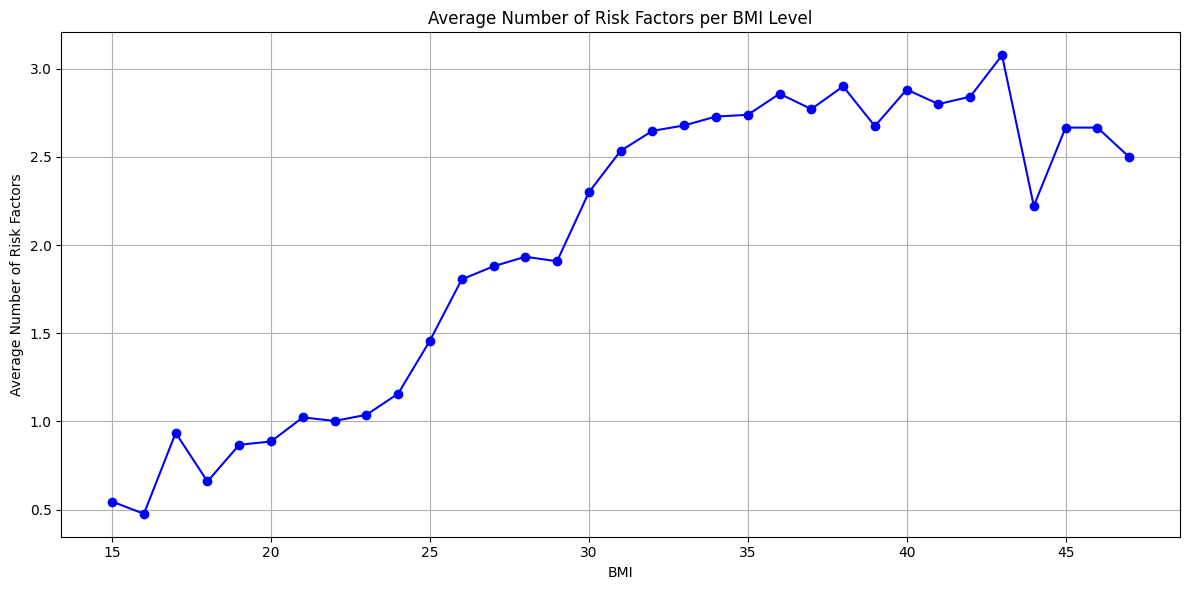

   Age  Gender   BMI  Waist_Circumference  Fasting_Blood_Glucose  \
0   30  Female  24.9                 27.0                     81   
1   24    Male  28.0                 33.1                     96   
2   79    Male  30.9                 54.6                    176   
3   75    Male  32.4                 57.2                    222   
4   65    Male  34.2                 50.4                    141   
5   51  Female  30.0                 40.4                    148   
6   18    Male  22.4                 32.9                     86   
7   71  Female  32.1                 46.4                    230   
8   39    Male  27.8                 36.3                     74   
9   81  Female  15.4                 29.7                    225   

    BMI_Category  Triglycerides  HDL_Cholesterol  High_Blood_Pressure  \
0  Normal weight            139               36                    0   
1     Overweight             52               42                    0   
2          Obese            268 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Print column names
print("Column names:")
print(df_adult.columns)

# Calculate the number of risk factors for each individual
def count_risk_factors(row):
    risk_factors = 0
    if (row['Gender'] == 'Female' and row['Waist_Circumference'] >= 35) or (row['Gender'] == 'Male' and row['Waist_Circumference'] >= 40):
        risk_factors += 1
    if row['Fasting_Blood_Glucose'] >= 100:
        risk_factors += 1
    if row['Triglycerides'] > 150:
        risk_factors += 1
    if (row['Gender'] == 'Female' and row['HDL_Cholesterol'] < 50) or (row['Gender'] == 'Male' and row['HDL_Cholesterol'] < 40):
        risk_factors += 1
    if row['High_Blood_Pressure'] == 1:
        risk_factors += 1
    return risk_factors

# Apply the function to calculate the number of risk factors
df_adult['Risk_Factors'] = df_adult.apply(count_risk_factors, axis=1)

# Group by BMI levels (units of 1) and calculate the average number of risk factors
df_adult['BMI_Rounded'] = df_adult['BMI'].round()
avg_risk_factors_per_bmi = df_adult.groupby('BMI_Rounded')['Risk_Factors'].mean()

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(avg_risk_factors_per_bmi.index, avg_risk_factors_per_bmi.values, marker='o', linestyle='-', color='b')
plt.title('Average Number of Risk Factors per BMI Level')
plt.xlabel('BMI')
plt.ylabel('Average Number of Risk Factors')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Print the DataFrame to review
print(df_adult.head(10))

#### **Age-Based Risk Factor Analysis and Visualization Algorithm**


I have implemented a sophisticated algorithm to analyze and visualize the relationship between age and metabolic risk factors. This approach combines data processing, statistical analysis, and data visualization techniques. Key features of the algorithm include:
Risk Factor Calculation: A custom function count_risk_factors is defined to evaluate each individual's risk factors based on gender-specific thresholds for waist circumference, fasting blood glucose, triglycerides, HDL cholesterol, and blood pressure status.
Data Transformation: The algorithm applies the risk factor calculation function to each row of the dataset using pandas' apply method, creating a new 'Risk_Factors' column.
Age-Based Aggregation: Age values are rounded to the nearest integer to create discrete groups. The mean number of risk factors for each age group is then calculated using pandas' groupby and mean functions.
Data Visualization: Matplotlib is utilized to create a line plot showing the relationship between age and average number of risk factors. The plot includes markers for data points, a grid for easier reading, and clear labeling of axes and title.
Data Verification: The algorithm prints the first 10 rows of the updated DataFrame, allowing for a quick verification of the newly calculated risk factor counts and rounded age values.
This approach enables a clear visualization of how metabolic risk factors evolve with age, potentially revealing critical age thresholds where risk factors significantly increase. The use of pandas for data manipulation and matplotlib for visualization allows for efficient processing and clear presentation of results, facilitating insights into the relationship between age and metabolic health risks. This analysis can be particularly valuable for understanding age-related health trends and informing age-specific health interventions.


Column names:
Index(['Age', 'Gender', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose',
       'BMI_Category', 'Triglycerides', 'HDL_Cholesterol',
       'High_Blood_Pressure', 'Metabolic_Syndrome', 'Risk_Factors',
       'BMI_Rounded'],
      dtype='object')


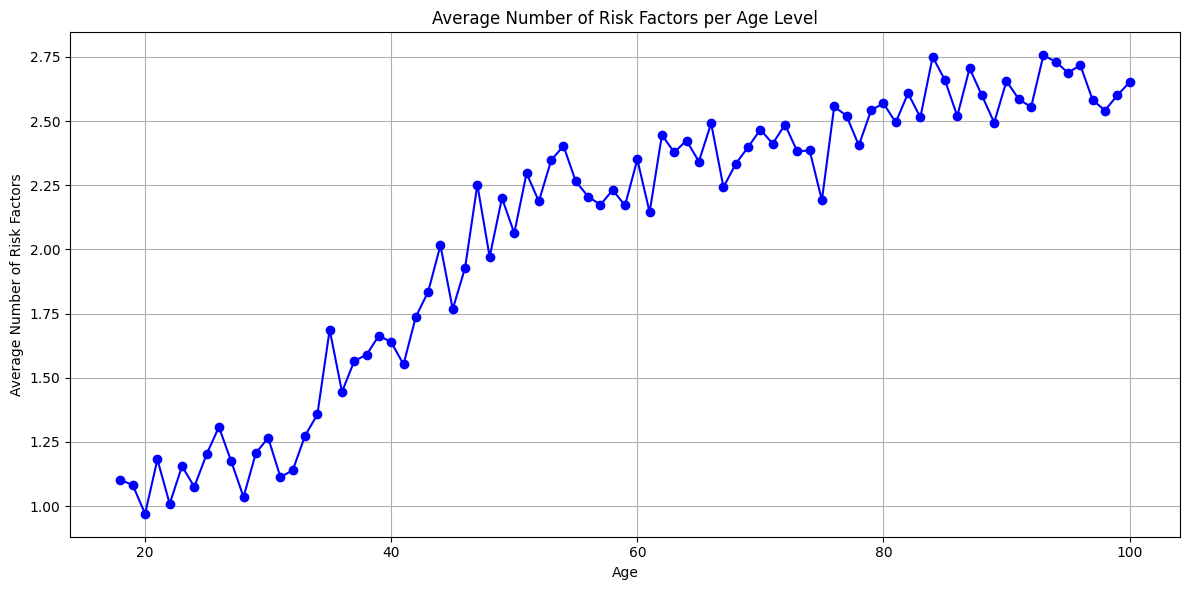

   Age  Gender   BMI  Waist_Circumference  Fasting_Blood_Glucose  \
0   30  Female  24.9                 27.0                     81   
1   24    Male  28.0                 33.1                     96   
2   79    Male  30.9                 54.6                    176   
3   75    Male  32.4                 57.2                    222   
4   65    Male  34.2                 50.4                    141   
5   51  Female  30.0                 40.4                    148   
6   18    Male  22.4                 32.9                     86   
7   71  Female  32.1                 46.4                    230   
8   39    Male  27.8                 36.3                     74   
9   81  Female  15.4                 29.7                    225   

    BMI_Category  Triglycerides  HDL_Cholesterol  High_Blood_Pressure  \
0  Normal weight            139               36                    0   
1     Overweight             52               42                    0   
2          Obese            268 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Print column names
print("Column names:")
print(df_adult.columns)

# Calculate the number of risk factors for each individual
def count_risk_factors(row):
    risk_factors = 0
    if (row['Gender'] == 'Female' and row['Waist_Circumference'] >= 35) or (row['Gender'] == 'Male' and row['Waist_Circumference'] >= 40):
        risk_factors += 1
    if row['Fasting_Blood_Glucose'] >= 100:
        risk_factors += 1
    if row['Triglycerides'] >= 150:
        risk_factors += 1
    if (row['Gender'] == 'Female' and row['HDL_Cholesterol'] < 50) or (row['Gender'] == 'Male' and row['HDL_Cholesterol'] < 40):
        risk_factors += 1
    if row['High_Blood_Pressure'] == 1:
        risk_factors += 1
    return risk_factors

# Apply the function to calculate the number of risk factors
df_adult['Risk_Factors'] = df_adult.apply(count_risk_factors, axis=1)

# Group by age levels (units of 1) and calculate the average number of risk factors
df_adult['Age_Rounded'] = df_adult['Age'].round()
avg_risk_factors_per_age = df_adult.groupby('Age_Rounded')['Risk_Factors'].mean()

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(avg_risk_factors_per_age.index, avg_risk_factors_per_age.values, marker='o', linestyle='-', color='b')
plt.title('Average Number of Risk Factors per Age Level')
plt.xlabel('Age')
plt.ylabel('Average Number of Risk Factors')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Print the DataFrame to review
print(df_adult.head(10))

In [16]:
print(list(df_adult.columns))

['Age', 'Gender', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 'BMI_Category', 'Triglycerides', 'HDL_Cholesterol', 'High_Blood_Pressure', 'Metabolic_Syndrome', 'Risk_Factors', 'BMI_Rounded', 'Age_Rounded']


#### **Conclusion**

The project successfully generated a synthetic dataset that mirrors the adult US population's age and BMI distribution, providing a robust foundation for analyzing metabolic health risks. By employing various probabilistic algorithms, the dataset accurately simulates realistic health metrics, including waist circumference, fasting blood glucose, triglyceride levels, HDL cholesterol, and high blood pressure.

The identification of metabolic syndrome using established clinical criteria and the standardization of dataset columns facilitated comprehensive analysis. The synthetic dataset showed that 34.58% of individuals had metabolic syndrome, which closely aligns with the prevalence rate for the US adult population, typically estimated at around 34-35%. This alignment with expected prevalence rates enhances the credibility of the synthetic data.

Visualization strategies revealed critical trends in health metrics across BMI and age categories, while comparative analysis with NHANES data highlighted areas for refinement.

The comparative analysis between the synthetic dataset and NHANES reference data reveals several key insights into the alignment and deviations of our generated data. The results are summarized as follows:

The percentage of individuals with Metabolic Syndrome is 34.58% which closely aligns with the prevalence rate for the US adult population, typically estimated at around 34-35%. This alignment with expected prevalence rates enhances the credibility of the synthetic data.

Females with Waist Circumference (W/C) ≥ 35 inches: The synthetic data shows 58.83%, which is an 8.79% decrease compared to the NHANES reference of 64.5%.

Males with Waist Circumference (W/C) ≥ 40 inches: The synthetic data indicates 63.42%, significantly higher by 42.52% compared to the NHANES reference of 44.5%.

Fasting Blood Glucose (FBG) ≥ 100 mg/dL: The synthetic data reports 40.93%, showing a 13.69% increase over the NHANES reference of 36.0%.

Triglycerides > 150 mg/dL: The synthetic data shows 30.56%, which is a 21.75% increase compared to the NHANES reference of 25.1%.

Males with HDL < 40 mg/dL: The synthetic data indicates 32.47%, reflecting a 13.93% increase over the NHANES reference of 28.5%.

Females with HDL < 50 mg/dL: The synthetic data shows 15.05%, which is a substantial 69.07% increase compared to the NHANES reference of 8.9%.

High Blood Pressure: The synthetic data reports 42.41%, showing an 11.83% decrease compared to the NHANES reference of 48.1%.

These results indicate that while some metrics in the synthetic data closely align with the NHANES reference data, others exhibit significant deviations. Notably, the synthetic data overestimates the prevalence of high waist circumference in males and low HDL in females, while underestimating high blood pressure prevalence. These discrepancies highlight areas where the synthetic data generation process may need refinement to better match real-world distributions, ensuring more accurate and reliable simulations for health-related analyses.


Synthetic datasets are crucial in protecting individual privacy while allowing researchers to analyze trends and patterns without exposing sensitive personal information. They are used to develop, test, and train machine learning algorithms and predictive models in healthcare, enabling robust performance evaluation without real-world data limitations. Researchers can use synthetic datasets to simulate various scenarios and interventions, helping to predict outcomes and optimize strategies for public health initiatives. Synthetic data provides a valuable resource for educational purposes, allowing students and trainees to practice data analysis and interpretation skills in a risk-free environment. Additionally, synthetic datasets serve as benchmarks for validating new analytical tools and methodologies, ensuring their effectiveness before applying them to real-world data.

